In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [5]:
russia_bad =  pd.read_csv("russia_losses_equipment.csv", delimiter=",")


In [6]:
russia_bad.columns

Index(['date', 'day', 'aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment'],
      dtype='object')

In [7]:
russia_bad.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN


In [8]:
russia_bad.shape


(22, 14)

In [6]:
russia_bad.describe()

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.0,22.000000,22.000000,22.000000,3.000000
mean,12.500000,50.000000,62.681818,291.272727,1036.954545,116.772727,46.863636,474.681818,60.0,5.727273,2.545455,22.454545,10.333333
std,6.493587,23.389049,32.482063,106.204287,246.751751,45.022673,21.857320,217.581815,0.0,3.312053,0.509647,14.470750,0.577350
min,2.000000,10.000000,7.000000,80.000000,516.000000,49.000000,4.000000,100.000000,60.0,0.000000,2.000000,0.000000,10.000000
25%,7.250000,30.000000,31.000000,212.500000,871.500000,86.250000,40.500000,359.750000,60.0,3.000000,2.000000,9.500000,10.000000
50%,12.500000,47.000000,74.000000,296.500000,1017.500000,118.500000,53.000000,464.000000,60.0,7.000000,3.000000,25.000000,10.000000
75%,17.750000,70.000000,85.250000,371.000000,1220.750000,138.750000,62.000000,596.250000,60.0,7.000000,3.000000,33.750000,10.500000
max,23.000000,93.000000,112.000000,450.000000,1448.000000,205.000000,72.000000,879.000000,60.0,12.000000,3.000000,43.000000,11.000000


In [7]:
russia_bad.isna().sum()

date                      0
day                       0
aircraft                  0
helicopter                0
tank                      0
APC                       0
field artillery           0
MRL                       0
military auto             0
fuel tank                 0
drone                     0
naval ship                0
anti-aircraft warfare     0
special equipment        19
dtype: int64

In [8]:
russia_bad["special equipment"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19    10.0
20    10.0
21    11.0
Name: special equipment, dtype: float64

# Null Values
it seems that around 80% of the null values are in one column called special equipments. For the non-null values in this column, they are too small to have an impact on answering my question.Therefore, from now one, I will be dropping this column whenever I making an analysis.


Text(0.5, 1.0, 'correlation')

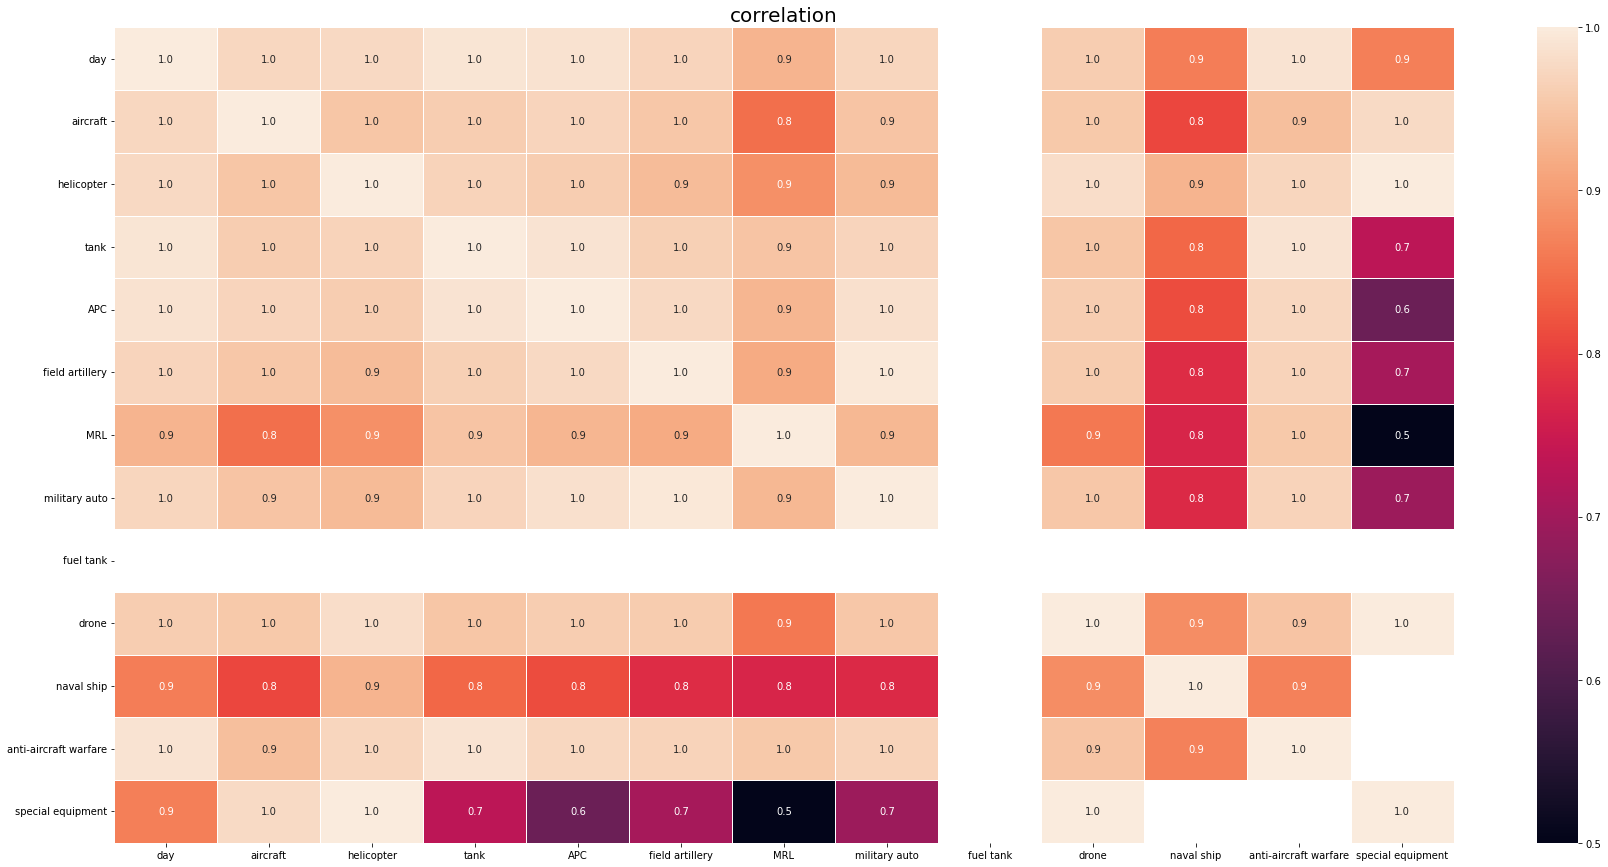

In [9]:
plt.figure(figsize=(30,15))
sns.heatmap(data = russia_bad.corr(), annot = True, fmt = ".1f", linewidth = 1)
plt.title("correlation",fontsize = 20)

# Correlation
Most of the variables have a strong positive correlation with each other. This shows that when one variable increases, the other increases as well. One thing to note is the lack of information for "fuel tank". This could be because there was little
to no change in that column.

# Dropping "day" column
the day column will be useless as the date column has more information on time.

<AxesSubplot:>

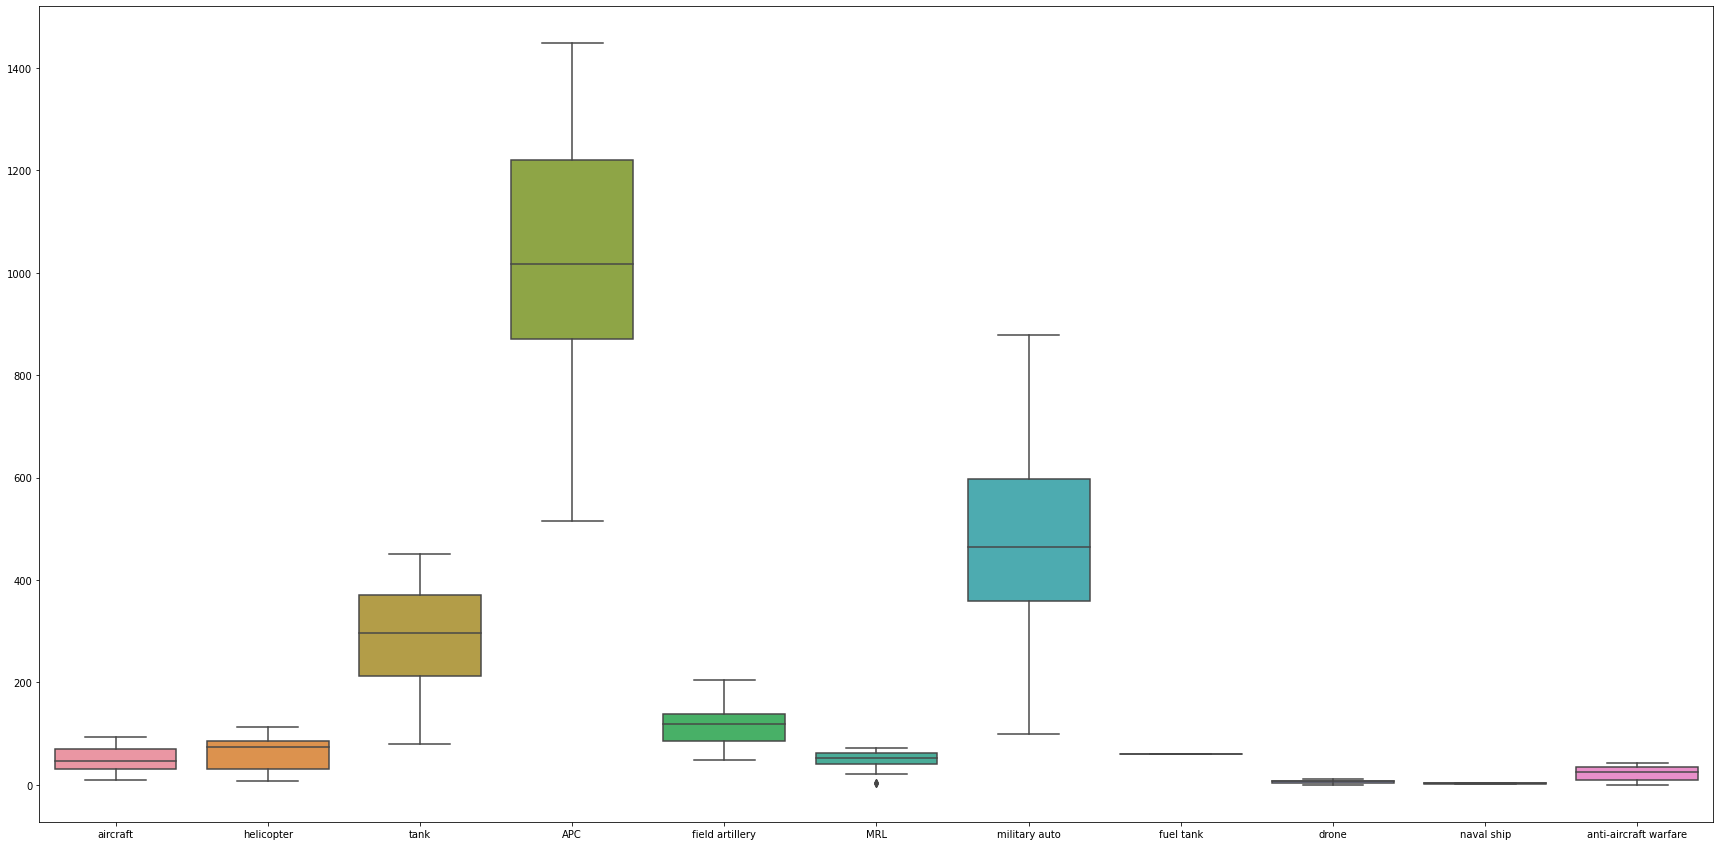

In [10]:
new_data = russia_bad.drop(["day","special equipment"],axis=1)
plt.figure(figsize=(30,15))                       
sns.boxplot(data = new_data)



# Boxplot
Boxplots of APC and military auto appear to be above the rest of the other equipment. These boxplots have a higher range and variation. Across the boxplots , i see very few outliers. Fuel tank,BUK and naval ship are flat.

# Russia Cumulative Equipment Losses(as of march 18th)


In [11]:
# assigning a variable to the equipments name
equipment_names = list(russia_bad.drop(["date","day","special equipment"], axis=1))
print(equipment_names)

['aircraft', 'helicopter', 'tank', 'APC', 'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone', 'naval ship', 'anti-aircraft warfare']


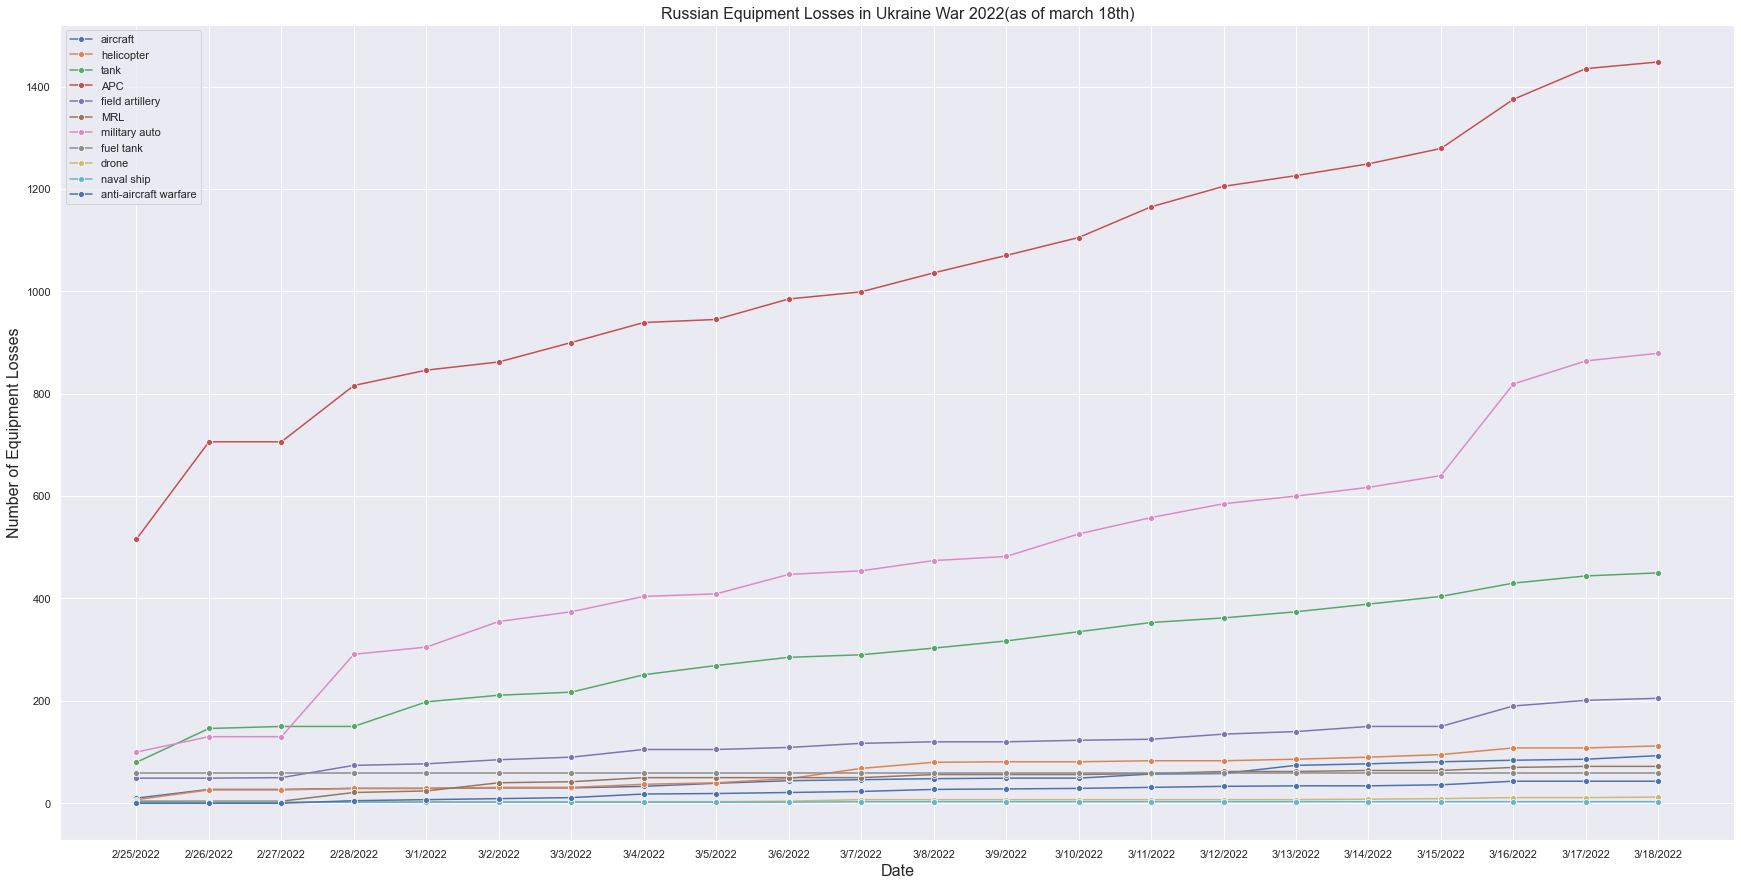

In [12]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(30,15))

for equipment in equipment_names:
    sns.lineplot(x='date', y=equipment, data=russia_bad, marker='o')

plt.xlabel('Date',fontsize=16)
plt.ylabel('Number of Equipment Losses',size=16)
plt.title('Russian Equipment Losses in Ukraine War 2022(as of march 18th)', size=16)
plt.legend(labels=equipment_names)

# It is hard to know what it going on to the equipments at the bottom.I will be removing variables such as "APC" that have high quantity and replot to take a closer look.

In [13]:
smaller_equipments_names = list(russia_bad.drop(["date","day","special equipment","APC","military auto"], axis=1))
print(smaller_equipments_names)

['aircraft', 'helicopter', 'tank', 'field artillery', 'MRL', 'fuel tank', 'drone', 'naval ship', 'anti-aircraft warfare']


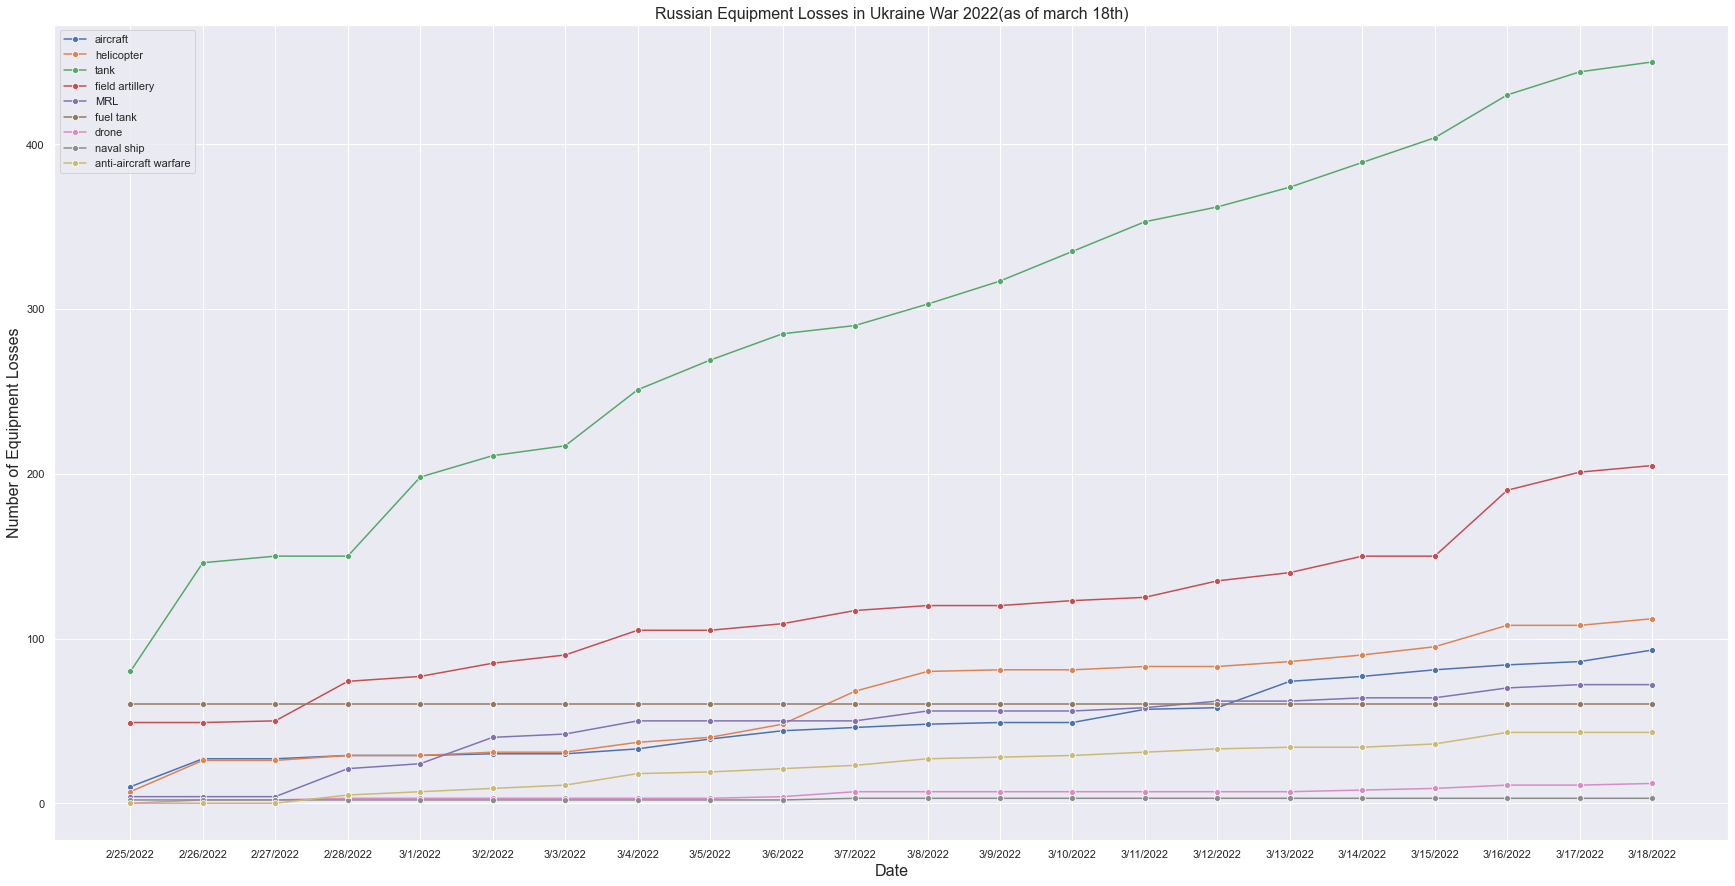

In [14]:
plt.figure(figsize=(30,15))
for equipment in smaller_equipments_names:
    sns.lineplot(x='date', y=equipment, data=russia_bad, marker='o')

plt.xlabel('Date',fontsize=16)
plt.ylabel('Number of Equipment Losses',size=16)
plt.title('Russian Equipment Losses in Ukraine War 2022(as of march 18th)', size=16)
plt.legend(labels=smaller_equipments_names)

# Redoing it again by removing more high quantity variables to look at the smaller variables.

In [15]:
even_smaller_equipments_name = list(russia_bad.drop(["date","day","special equipment","APC","military auto","tank"], axis=1))


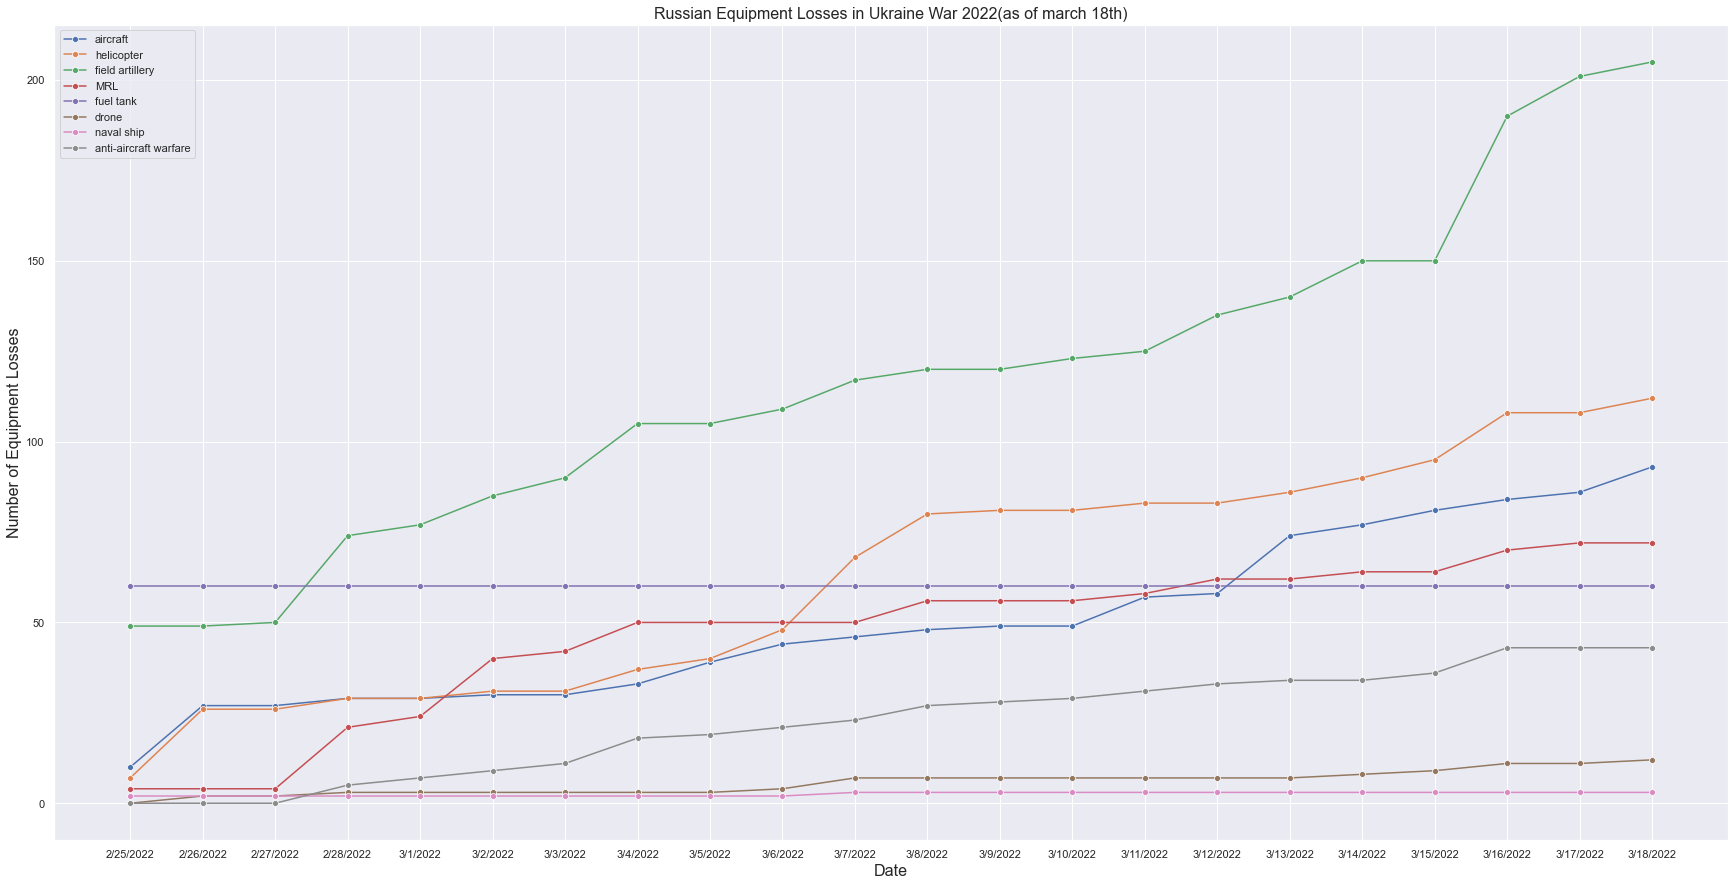

In [16]:
plt.figure(figsize=(30,15))
for equipment in even_smaller_equipments_name:
    sns.lineplot(x='date', y=equipment, data=russia_bad, marker='o')

plt.xlabel('Date',fontsize=16)
plt.ylabel('Number of Equipment Losses',size=16)
plt.title('Russian Equipment Losses in Ukraine War 2022(as of march 18th)', size=16)
plt.legend(labels=even_smaller_equipments_name)

# Graph analysis
After slowly magnifying the time series plots, I can say that there is a positive trend with most equipment. However, I cannot pick the dates where I can see a considerable spike or increase in the equipment losses. I see a substantial increase in losses from Feb 27 to Feb 28 in some equipment. But I also see that there are some dates where there is a large increase for only one or two equipment. An example of this is Feb 28 to March 1st for "MRL". Because I cannot decide which dates I want from these graphs, I will create a data frame that sums the accumulated losses across the equipment by date. I should then be able to pick dates to look at.

# Plotting the total cumulative losses of all the equipments over time

In [17]:

#creating dataframe
sum_of_losses = pd.DataFrame()
#adding original dataframe column "date" to new dataframe
sum_of_losses["date"] = russia_bad["date"]
#summing all rows by date
sum_of_losses["total equipment cumulative loss"] = russia_bad[equipment_names].agg(sum,axis=1)


    
sum_of_losses.reset_index()
    




,index,date,total equipment cumulative loss
0,0,2/25/2022,828
1,1,2/26/2022,1152
2,2,2/27/2022,1157
3,3,2/28/2022,1480
4,4,3/1/2022,1580
5,5,3/2/2022,1688
6,6,3/3/2022,1760
7,7,3/4/2022,1902
8,8,3/5/2022,1941
9,9,3/6/2022,2055


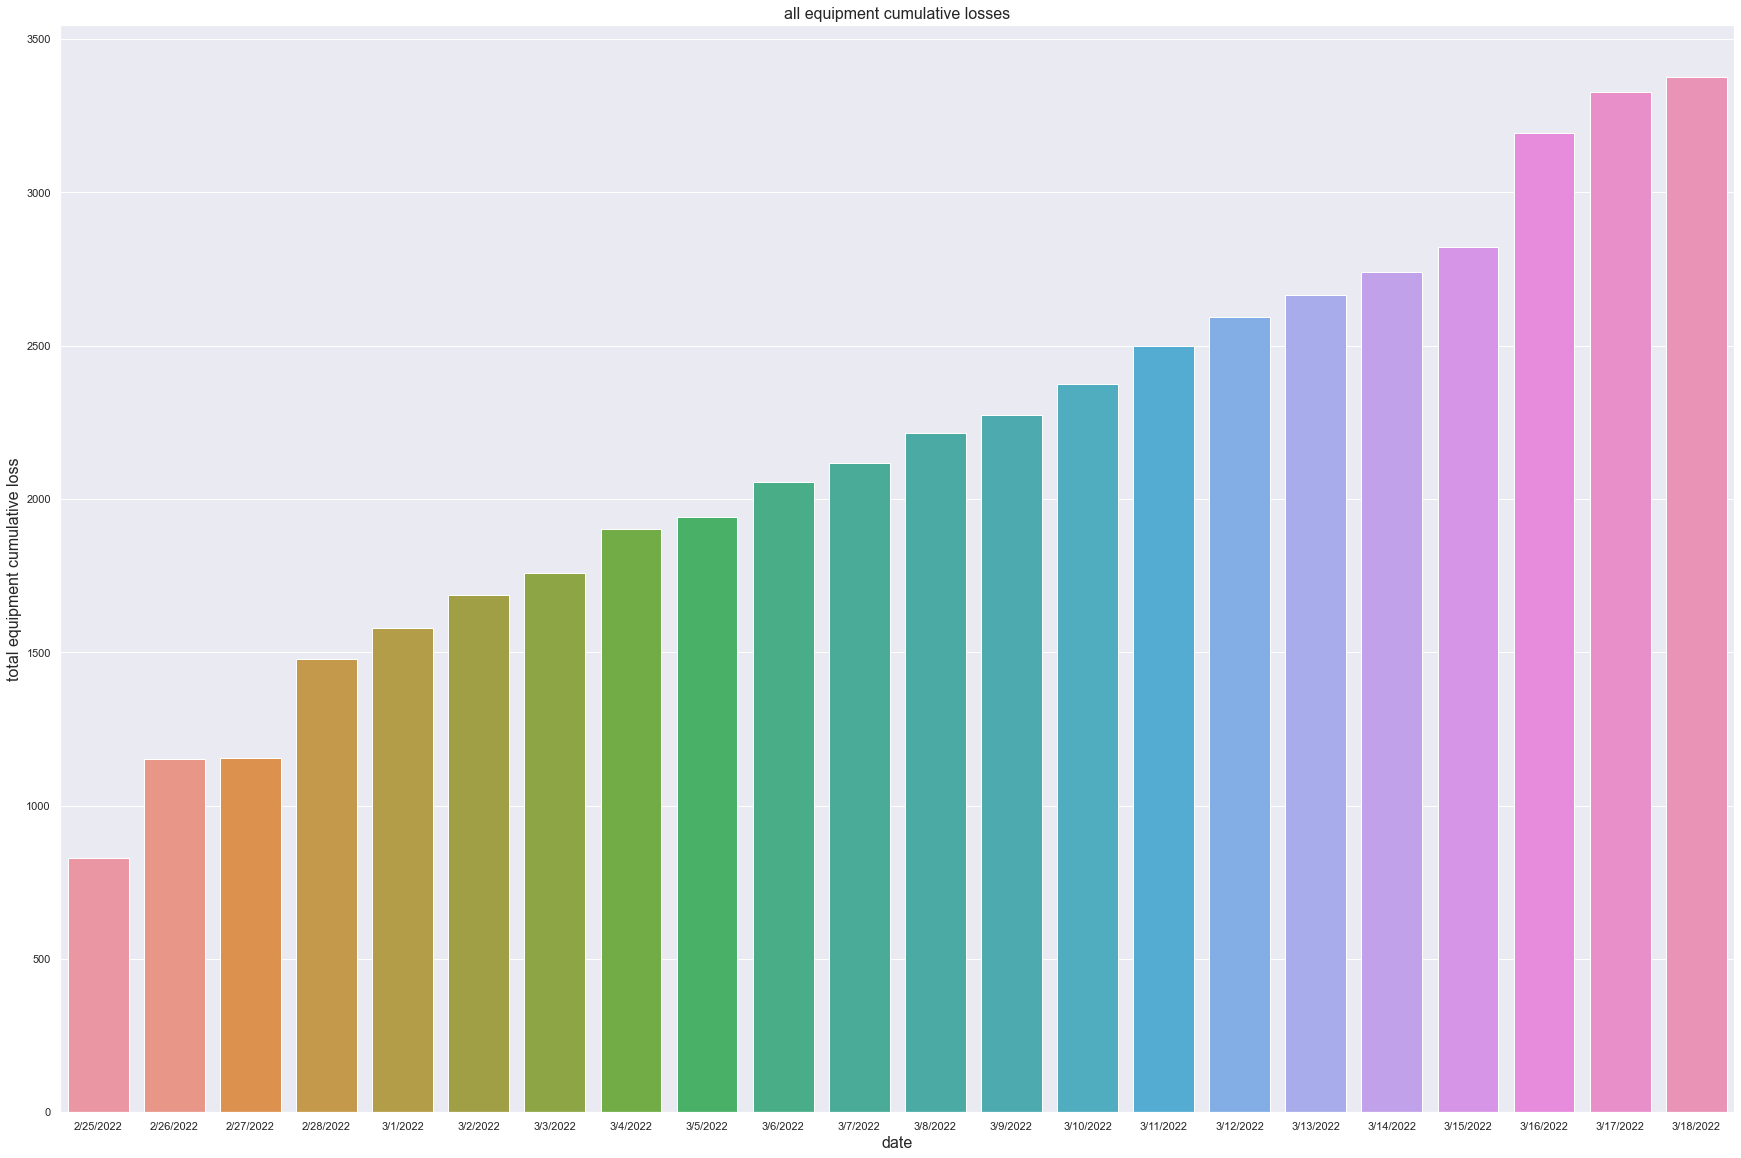

In [18]:
plt.figure(figsize=(30, 20))
sns.barplot(x = "date", y = "total equipment cumulative loss", data = sum_of_losses)
plt.xlabel('date',fontsize=16)
plt.ylabel('total equipment cumulative loss',fontsize=16)
plt.title("all equipment cumulative losses",fontsize =16)
plt.show()

Text(0.5, 1.0, 'Russian total Cumulative Equipment Losses in Ukraine War (as of march 18th)')

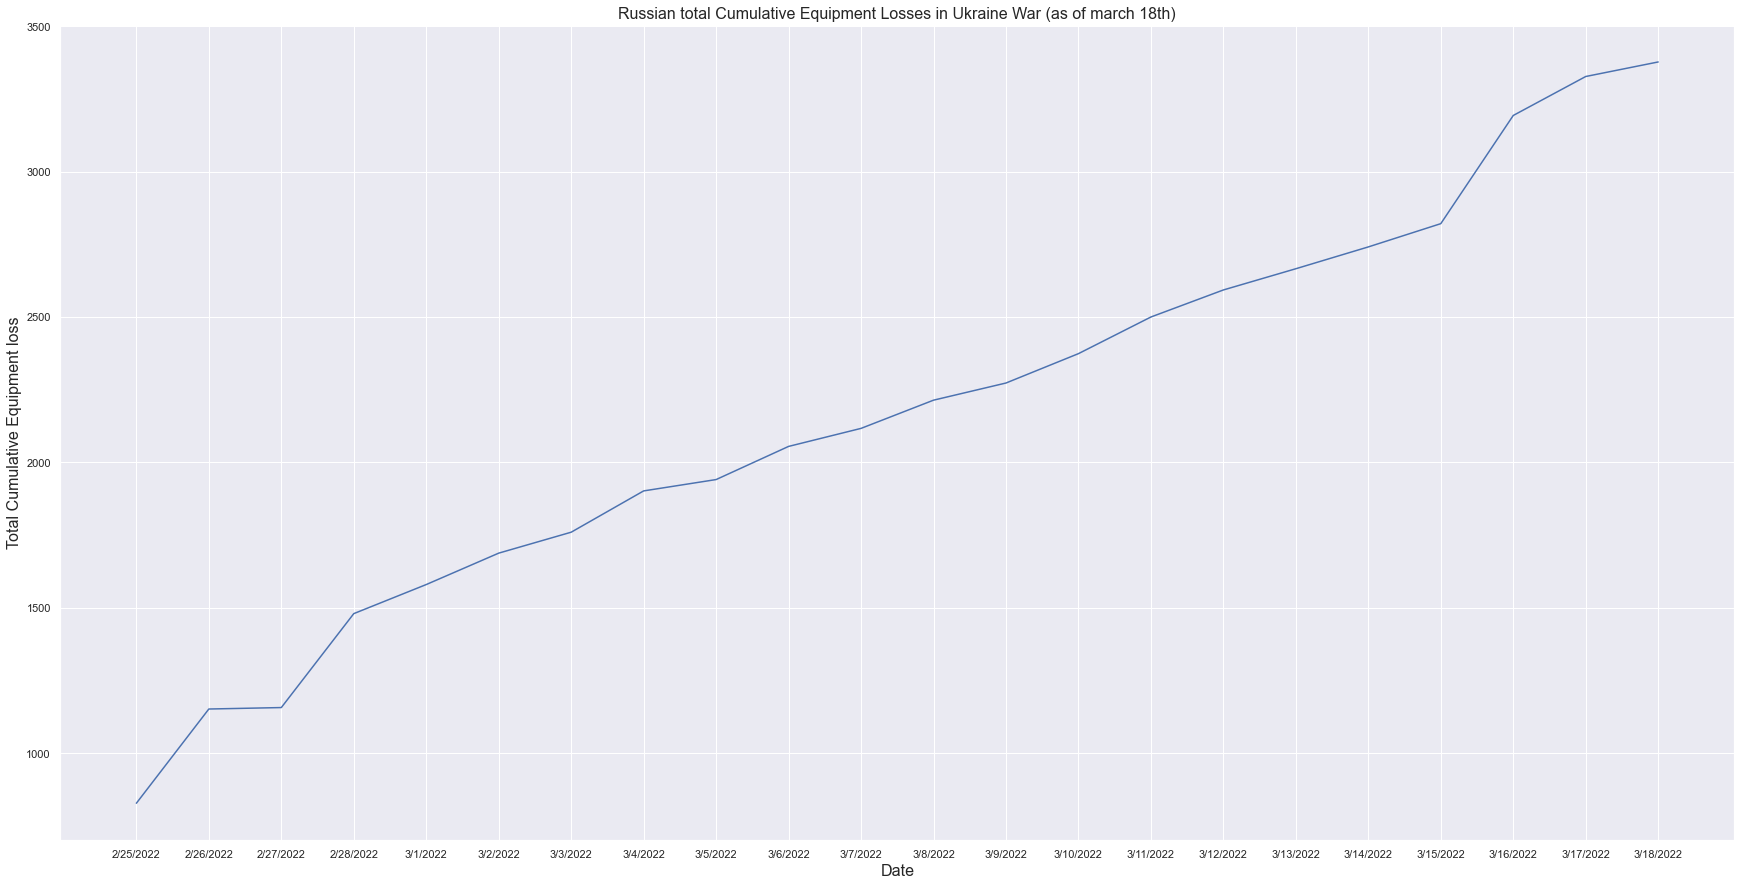

In [19]:
plt.figure(figsize=(30,15))
sns.lineplot(x='date', y = "total equipment cumulative loss", data = sum_of_losses)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Total Cumulative Equipment loss',size=16)
plt.title('Russian total Cumulative Equipment Losses in Ukraine War (as of march 18th)', size=16)

# Barplot and lineplot analysis
Looking at the total cumulative loss of all equipment, I can see there is a positive trend as the previous plots.However, this time I can clearly pick the dates where there is a considerable increase.Feb 27 to Feb 28 ,feb 25 to feb 26 and March 15 to March 16. For simpilicity,  I will only be using the end dates of two  intervals. Feb 28 and march 16
Doing the previous analysis, i believe equipment "APC" and "military auto" are mostly contributing to the large leaps in equipment cumulative losses

# Tweets
Next, with the dates selected, I will do analysis on the tweets with those dates.

In [20]:
march16 = pd.read_csv("UkraineCombinedTweetsDeduped_MAR16.csv.gzip",compression = 'gzip')
feb28 = pd.read_csv("UkraineCombinedTweetsDeduped_FEB28_part1.csv.gzip",compression = 'gzip')

C:\Users\Stephen Williams\AppData\Local\Temp\ipykernel_13852\551459047.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  feb28 = pd.read_csv("UkraineCombinedTweetsDeduped_FEB28_part1.csv.gzip",compression = 'gzip')


In [21]:
march16.columns


Index(['Unnamed: 0', 'userid', 'username', 'acctdesc', 'location', 'following',
       'followers', 'totaltweets', 'usercreatedts', 'tweetid',
       'tweetcreatedts', 'retweetcount', 'text', 'hashtags', 'language',
       'coordinates', 'favorite_count', 'extractedts'],
      dtype='object')

In [22]:
march16.head(10)

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
0,0,1407899290790473732,SectionChine,"Infos sans préjugés sur la Chine, avec une dom...",NaN,1313,1299,180,2021-06-24 06:06:32.000000,1503883744695885825,2022-03-16 00:00:00,0,Grosse #intox US en vue de sanctionner Pékin:\...,"[{'text': 'intox', 'indices': [7, 13]}, {'text...",fr,NaN,0,2022-03-16 00:07:48.913859
1,1,1121000072181899265,MertiumCrypto,Personalized Feed of Trending Crypto & Finance...,"New York, US",171,1820,10586,2019-04-24 10:36:59.000000,1503883744792518658,2022-03-16 00:00:00,0,Stock futures rise as investors monitor Russia...,"[{'text': 'stocks', 'indices': [199, 206]}, {'...",en,NaN,0,2022-03-16 00:07:48.905635
2,2,22240612,AlArabiya_Eng,The Arab world’s leading source of global news...,Dubai,45,911044,311992,2009-02-28 08:31:32.000000,1503883745123786762,2022-03-16 00:00:00,2,The US reauthorizes sanctions against #Belarus...,"[{'text': 'Belarusia', 'indices': [38, 48]}, {...",en,NaN,4,2022-03-16 00:37:47.306801
3,3,1118771564,lauracuicui,Photo / Photojournalisme | Casse l’ambiance en...,"Nord-Pas-de-Calais, France",1359,105,6408,2013-01-25 08:33:18.000000,1503883745182601222,2022-03-16 00:00:00,15870,#Ukraine Irpin. Andriy Kulik is trying to comf...,"[{'text': 'Ukraine', 'indices': [20, 28]}]",en,NaN,0,2022-03-16 00:07:48.897631
4,4,1583986518,ChronOpinion,Agenda-setting opinions. 2017 Pulitzer Prize E...,"Houston, TX",2885,4030,18377,2013-07-10 20:56:48.000000,1503883745593593858,2022-03-16 00:00:00,0,"On #Ukraine and #Russia: ""Well, the old cliché...","[{'text': 'Ukraine', 'indices': [3, 11]}, {'te...",en,NaN,0,2022-03-16 00:07:48.889609
5,5,2852858199,interdamazonia,O olhar dos Internacionalistas Amazônidas para...,"Belém, PA - Brasil",456,666,8853,2014-10-31 02:40:20.000000,1503883745991938049,2022-03-16 00:00:00,0,#Rússia emite #sanções contra Joe #Biden e o p...,"[{'text': 'Rússia', 'indices': [0, 7]}, {'text...",pt,NaN,0,2022-03-16 00:07:48.881672
6,6,223565757,MGLFed,We’ve supported military and federal families ...,"Arlington, VA",193,293,4068,2010-12-06 18:58:32.000000,1503883746008776705,2022-03-16 00:00:00,1,The war in #Ukraine is continually changing wi...,"[{'text': 'Ukraine', 'indices': [11, 19]}, {'t...",en,NaN,1,2022-03-16 00:07:48.873725
7,7,2964974777,screaminglibral,Retired educator w/attitude! #ClimateChangeIsR...,NaN,3675,4885,150450,2015-01-06 21:19:40.000000,1503883746025558016,2022-03-16 00:00:00,1,"So, when does @newscorp @FoxNews stop working ...","[{'text': 'PUTIN', 'indices': [70, 76]}]",en,NaN,0,2022-03-16 00:37:47.290654
8,8,1421284602,TheIranPulse,Tweets on Iran Pulse and Iran News. RTs not en...,NaN,1087,14257,33413,2013-05-11 18:28:57.000000,1503883746554093579,2022-03-16 00:00:00,2,#Iran credits #Russia with 'constructive' role...,"[{'text': 'Iran', 'indices': [0, 5]}, {'text':...",en,NaN,4,2022-03-16 00:07:48.857861
9,9,1366113944633548801,jorg_scherer,"Politologe, Kosmopolit, Antifaschist, liebt Ka...",Spiesen-Elversberg,1533,386,7089,2021-02-28 19:52:42.000000,1503883746612809734,2022-03-16 00:00:00,22,We are answering the most important questions ...,"[{'text': 'Ukraine', 'indices': [113, 121]}]",en,NaN,0,2022-03-16 00:07:48.849923


In [23]:
march16.shape

(440897, 18)

In [24]:
march16.isna().sum()

Unnamed: 0             0
userid                 0
username               0
acctdesc           86560
location          169409
following              0
followers              0
totaltweets            0
usercreatedts          0
tweetid                0
tweetcreatedts         0
retweetcount           0
text                   0
hashtags               0
language               0
coordinates       440124
favorite_count         0
extractedts            0
dtype: int64

In [25]:
feb28.head(10)

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
0,1498818,1471597898026532864,MohammadSurono4,اَلسَّلَامُ عَلَيْكُمْ وَرَحْمَةُ اللّٰـهِ وَب...,NaN,49,2,135,2021-12-16 21:47:57.000000,1498087325968273408,2022-02-28 00:07:06,831,#Moscow: Vladimir Putin visited the constructi...,"[{'text': 'Moscow', 'indices': [21, 28]}]",en,NaN,0,2022-02-28 00:13:28.984040
1,1498819,133711806,KotuKadir,"Vazgeçebilmek Özgürlüktür..,SüperDayı..\nALLAH...",NaN,297,327,38032,2010-04-16 12:54:22.000000,1498087327033352192,2022-02-28 00:07:06,7,"Il y a beaucoup de racisme, d'islamophobie et ...",[],fr,NaN,0,2022-02-28 00:13:28.975707
2,1498820,273249267,abner12a,"Conservador, Cristiano y Republicano",NaN,900,135,10052,2011-03-28 03:39:18.000000,1498087327838744578,2022-02-28 00:07:06,171,I will be filing a bill to sanction &amp; issu...,"[{'text': 'Ukraine', 'indices': [109, 117]}]",en,NaN,0,2022-02-28 00:13:28.967094
3,1498821,47435872,freeWorld2,Natürlich interessiere ich mich für Politik. I...,liberal. Animal politicum,4314,4046,181335,2009-06-15 20:31:13.000000,1498087328073592837,2022-02-28 00:07:06,25,Wenn ich #noAliceWeidelrichtig im #Bundestag v...,"[{'text': 'noAliceWeidelrichtig', 'indices': [...",de,NaN,0,2022-02-28 00:13:28.959034
4,1498822,313480107,chavez145,"Socially awkward and introverted, gamer, books...",United States,939,577,69258,2011-06-08 18:31:50.000000,1498087328933425153,2022-02-28 00:07:06,642,⚡️New York State Governor Kathy Hokul (Democra...,"[{'text': 'Russia', 'indices': [132, 139]}]",en,NaN,0,2022-02-28 00:13:28.950711
5,1498823,1074764936151228416,hasanrihan2,"""إعتنق الإنسانية .. ثم إعتنق ما شئت من الأديان...",Lebanon,1552,1562,16453,2018-12-17 20:35:03.000000,1498087330636308481,2022-02-28 00:07:07,4,🚨🚨كبير مستشارين الاتحاد الأوروبي : طائرات مقات...,"[{'text': 'روسيا', 'indices': [118, 124]}, {'t...",ar,NaN,0,2022-02-28 00:13:28.942690
6,1498824,1320298198565638144,_Ola4_,NaN,Polska,217,3,559,2020-10-25 09:36:47.000000,1498087331068190720,2022-02-28 00:07:07,281,SOUND ON.\n\nThis is what our every night look...,"[{'text': 'Kyiv', 'indices': [73, 78]}, {'text...",en,NaN,0,2022-02-28 00:13:28.934576
7,1498825,44830462,GeorgeSnow,NaN,"Port Coquitlam, BC, Canada",649,32,1244,2009-06-05 05:35:33.000000,1498087332339073024,2022-02-28 00:07:07,329,"""Ukrainian soldiers spot freezing puppy alone ...",[],en,NaN,0,2022-02-28 00:13:28.926471
8,1498826,2699320518,EddieArshaid,NaN,NaN,743,349,69565,2014-08-01 23:10:33.000000,1498087332561313795,2022-02-28 00:07:07,28,.#Putin #Ukraine https://t.co/azY67qh4uh,"[{'text': 'Putin', 'indices': [17, 23]}, {'tex...",und,NaN,0,2022-02-28 00:13:28.918369
9,1498827,2170195636,d7xen,"""Don't confuse schooling with education"" \n E...","Wirral, Merseyside, UK",1631,214,1630,2013-11-06 01:34:15.000000,1498087332863426567,2022-02-28 00:07:07,6,Closer look at the Vasylkiv oil depot fire whi...,"[{'text': 'osint', 'indices': [118, 124]}, {'t...",en,NaN,0,2022-02-28 00:13:28.910259


In [26]:
feb28.isna().sum()

Unnamed: 0             0
userid                 0
username               0
acctdesc           53043
location           99605
following              0
followers              0
totaltweets            0
usercreatedts          0
tweetid                0
tweetcreatedts         0
retweetcount           0
text                   0
hashtags               0
language               0
coordinates       237768
favorite_count         0
extractedts            0
dtype: int64

# Languages
I understand that english is not universal and twitter has many foreign users. I want to see how many tweets are in english and other languages.

In [27]:
#using langdetect to count the languages used in the tweets and store them in a dictionary
from langdetect import detect
from langdetect import DetectorFactory
DetectorFactory.seed = 0

def add_to_language_dictionary(string_input,dic):
    
    try:
        dic[detect(string_input)] += 1
    except KeyError:
        dic[detect(string_input)] = 1
#testing        
test = {}    
add_to_language_dictionary("i was walking my dog yesterday but i forgot i dont have a dog and i need help",test)
test

{'en': 1}

# Only "text" 
I will be only using the "text" column of each tweet dataset. It has the tweet itself from the user

In [28]:
#creating the language dictionary for march 16 tweets
march16_tweets = march16["text"]
count  = 0
march_16_lang_count = {}
for tweet in march16_tweets:
    
    add_to_language_dictionary(str(tweet),march_16_lang_count)
    count += 1
    #choosing only 1200 tweets
    if count == 1200:
        break
march_16_lang_count

{'fr': 40,
 'en': 871,
 'pt': 9,
 'es': 101,
 'sk': 3,
 'et': 12,
 'de': 32,
 'no': 6,
 'da': 5,
 'it': 36,
 'tl': 17,
 'id': 5,
 'ja': 16,
 'lt': 1,
 'tr': 8,
 'ru': 2,
 'pl': 8,
 'hu': 1,
 'uk': 2,
 'fa': 2,
 'fi': 8,
 'so': 2,
 'ca': 1,
 'th': 4,
 'ro': 1,
 'el': 1,
 'ar': 4,
 'sv': 1,
 'af': 1}

In [29]:
#preparing to plot the dictionary
keys = list (march_16_lang_count.keys())
vals = list(march_16_lang_count.values())


Text(0, 0.5, 'count')

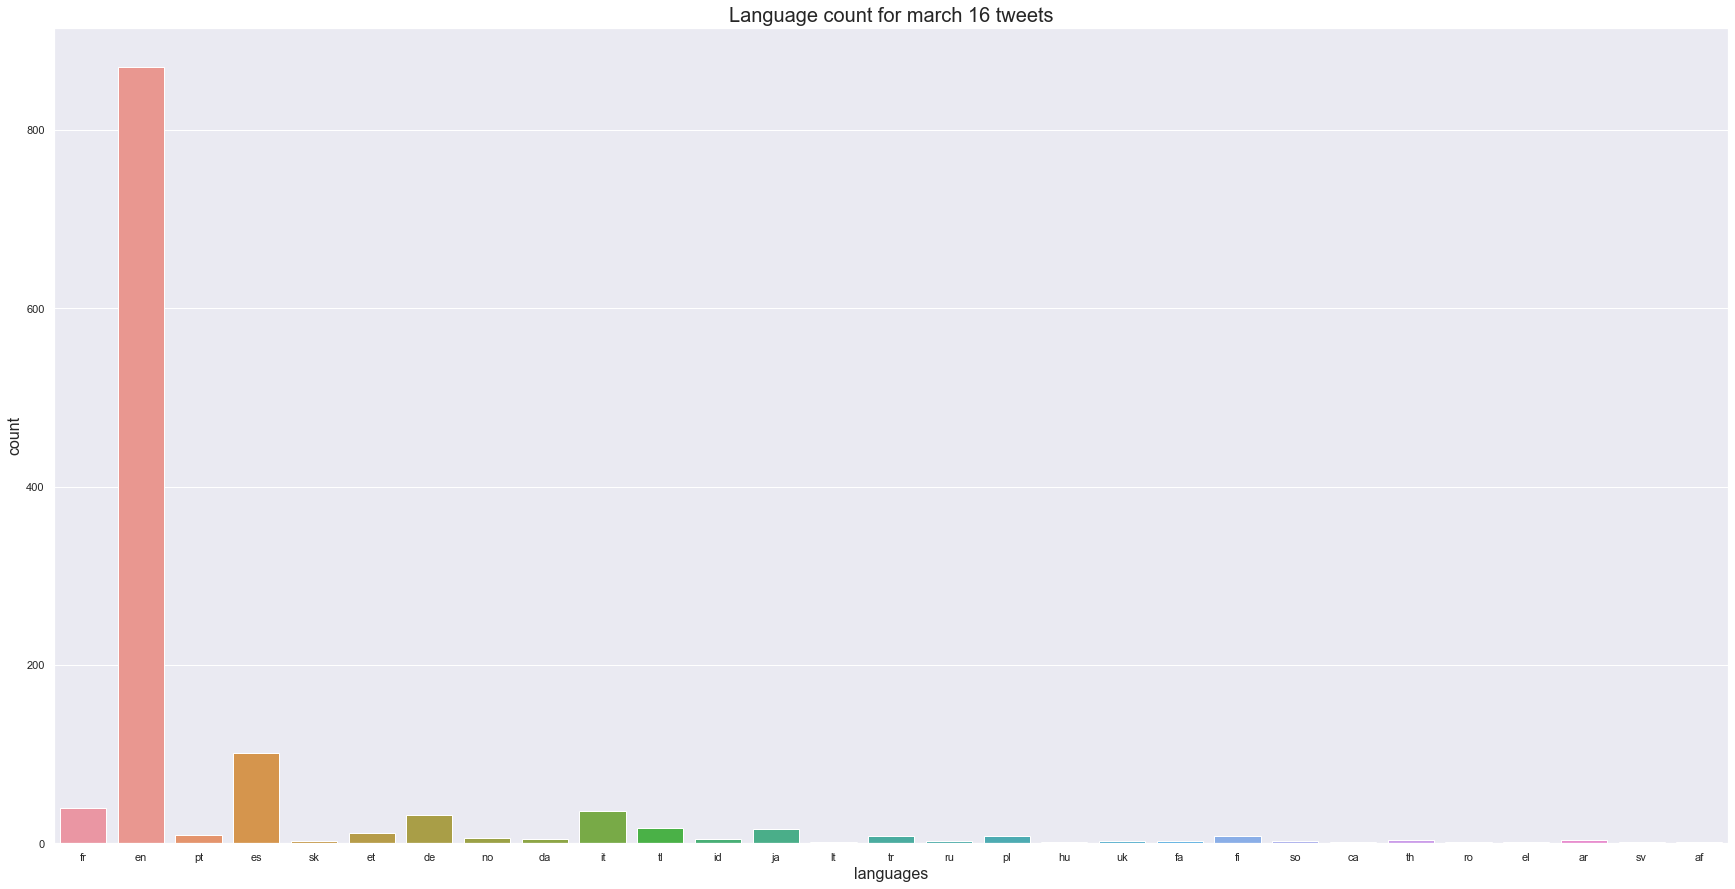

In [30]:
plt.figure(figsize=(30,15))
plt.title("Language count for march 16 tweets",fontsize = 20)
sns.barplot(x=keys, y=vals)
plt.xlabel('languages',fontsize=16)
plt.ylabel('count',size=16)

In [31]:
#creating the language dictionary for feb 28 tweets
feb28_tweets = feb28["text"]
count  = 0
feb28_lang_count = {}
for tweet in feb28_tweets:
    
    add_to_language_dictionary(str(tweet),feb28_lang_count)
    count += 1
    #choosing only 1200 tweets
    if count == 1200:
        break
feb28_lang_count

{'en': 967,
 'fr': 9,
 'de': 41,
 'ar': 16,
 'es': 52,
 'tr': 15,
 'hi': 3,
 'ja': 8,
 'pt': 19,
 'it': 29,
 'uk': 2,
 'et': 3,
 'ur': 1,
 'fi': 6,
 'hr': 1,
 'pl': 4,
 'th': 6,
 'id': 6,
 'ru': 3,
 'ca': 1,
 'ro': 1,
 'zh-cn': 2,
 'bg': 1,
 'af': 1,
 'no': 1,
 'ta': 1,
 'el': 1}

In [32]:
#preparing to plot the dictionary
keys = list (feb28_lang_count.keys())
vals = list(feb28_lang_count.values())

Text(0, 0.5, 'count')

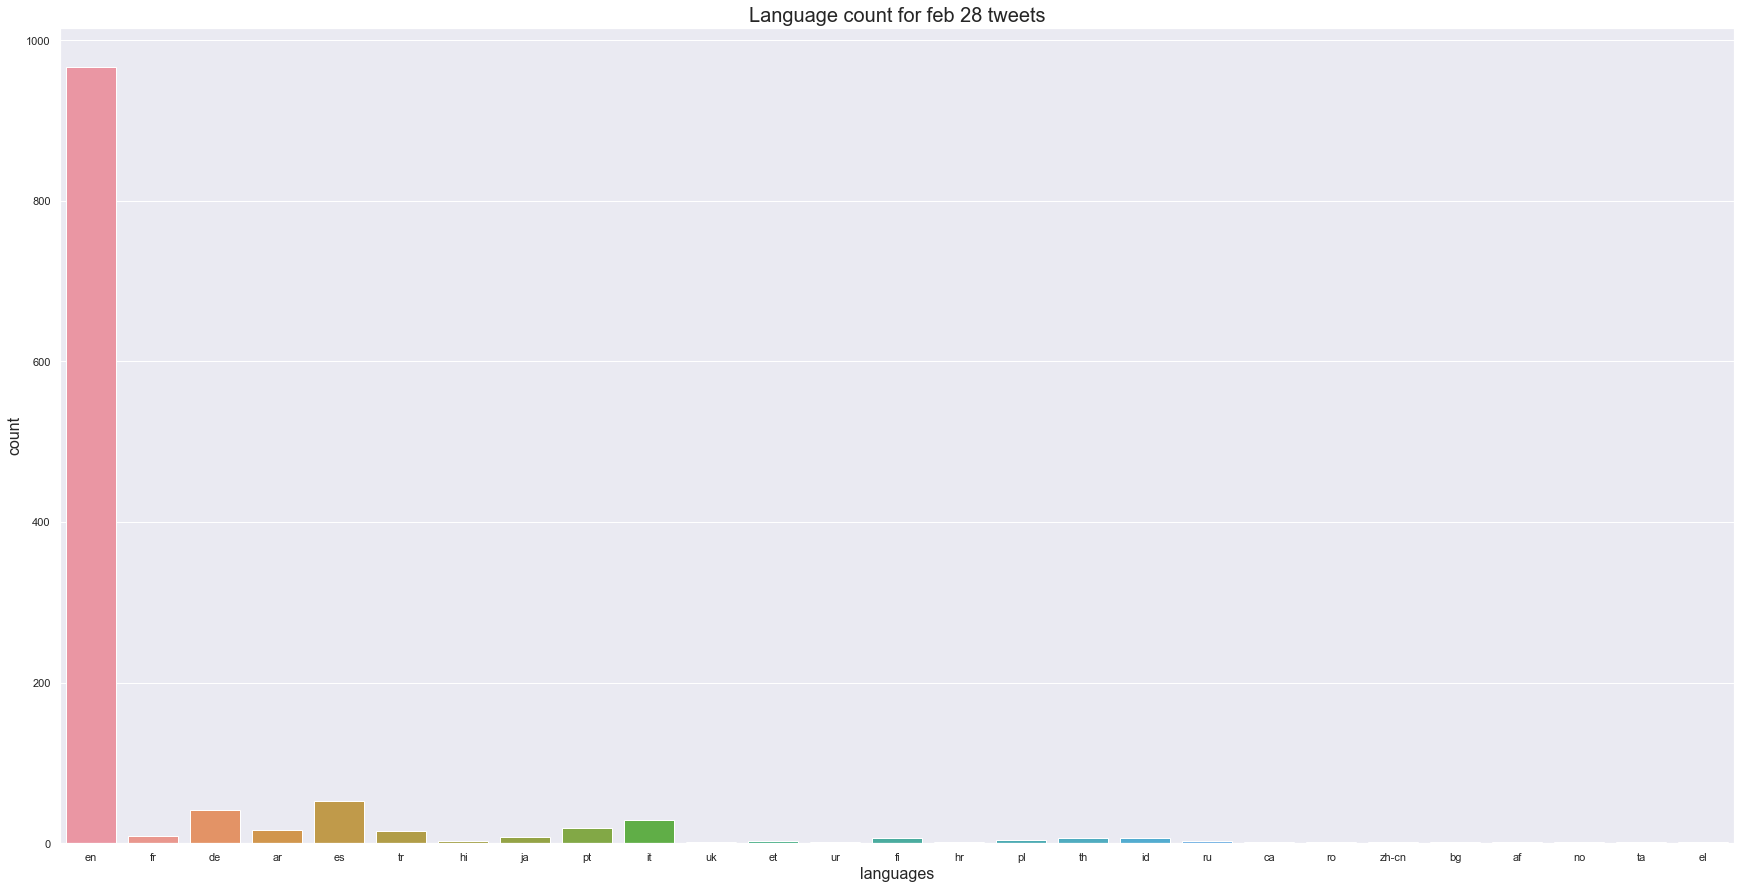

In [33]:
plt.figure(figsize=(30,15))
plt.title("Language count for feb 28 tweets",fontsize = 20)
sns.barplot(x=keys, y=vals)
plt.xlabel('languages',fontsize=16)
plt.ylabel('count',size=16)

# ENGLISH! and Sample size
It seems that english is the most used langauge for these tweets of both feb 28 and march 16. Moving forward, I will only looking at the words of english tweets since they represent most of the tweets.
Interestingly enough, when I use sample sizes over 1200, I meet an error of no feature found within text. The langdect module is reaching this error but i am unclear how to solve it. There is no null values for the "text" columns of either tweet dataset. Therefore, I will use only 1200 tweets.Plus, my computer migth freeze if i use any more


# Cleaning!
Next, I will be cleaning each dataset. Removing stopwords and punctuation

In [34]:
#creating function to handle the cleaning using regex and stopwords. It is incoporated in the dictionary function
import re
p = re.compile("[.,@;:!\"]")


def add_to_tweet_dictionary(string_input,dic):
    no_punctuation = re.sub(p,"",string_input)
    clean_string = no_punctuation.lower().split()
    stopwords = ["the","a","to","of","in","and","is","with","for","this","from","that","are","we","by","i","she","on"]
    for word in clean_string:
        if word in stopwords:
            continue
        try:
            dic[word] += 1
        except KeyError:
            dic[word] = 1
#just testing            
test = {}
string = "i hate sundays and mondays. Mondays blues @yourdad"
add_to_tweet_dictionary(string, test)
test

{'hate': 1, 'sundays': 1, 'mondays': 2, 'blues': 1, 'yourdad': 1}

In [37]:
#creating the word dictionary for march 16 tweets
march_16_words = {}
count = 0
for tweet in march16_tweets:
    #filtering out the non_english tweets
    if detect(tweet) != 'en':
        pass
    add_to_tweet_dictionary(str(tweet),march_16_words)
    count += 1
    #only using 1200 samples
    if count == 1200:
        break

# and then making a dictionary for top 20 words    
top_20_march16_words ={}
count = 0
for w in sorted(march_16_words, key=march_16_words.get, reverse=True):
    top_20_march16_words[w] = march_16_words[w]
    count += 1
    if count > 19:
        break
    
top_20_march16_words    

{'#ukraine': 574,
 'de': 236,
 '#russia': 231,
 'la': 183,
 'un': 157,
 'russian': 155,
 'en': 118,
 'was': 114,
 '&amp': 112,
 'el': 106,
 '#standwithukraine': 102,
 '#putin': 100,
 'not': 100,
 'war': 98,
 '-': 98,
 '#russian': 98,
 'ukraine': 95,
 'you': 94,
 '#kyiv': 91,
 'be': 91}

In [38]:
#preparing to plot the dictionary
keys = list (top_20_march16_words.keys())
vals = list(top_20_march16_words.values())
vals

[574,
 236,
 231,
 183,
 157,
 155,
 118,
 114,
 112,
 106,
 102,
 100,
 100,
 98,
 98,
 98,
 95,
 94,
 91,
 91]

Text(0, 0.5, 'count')

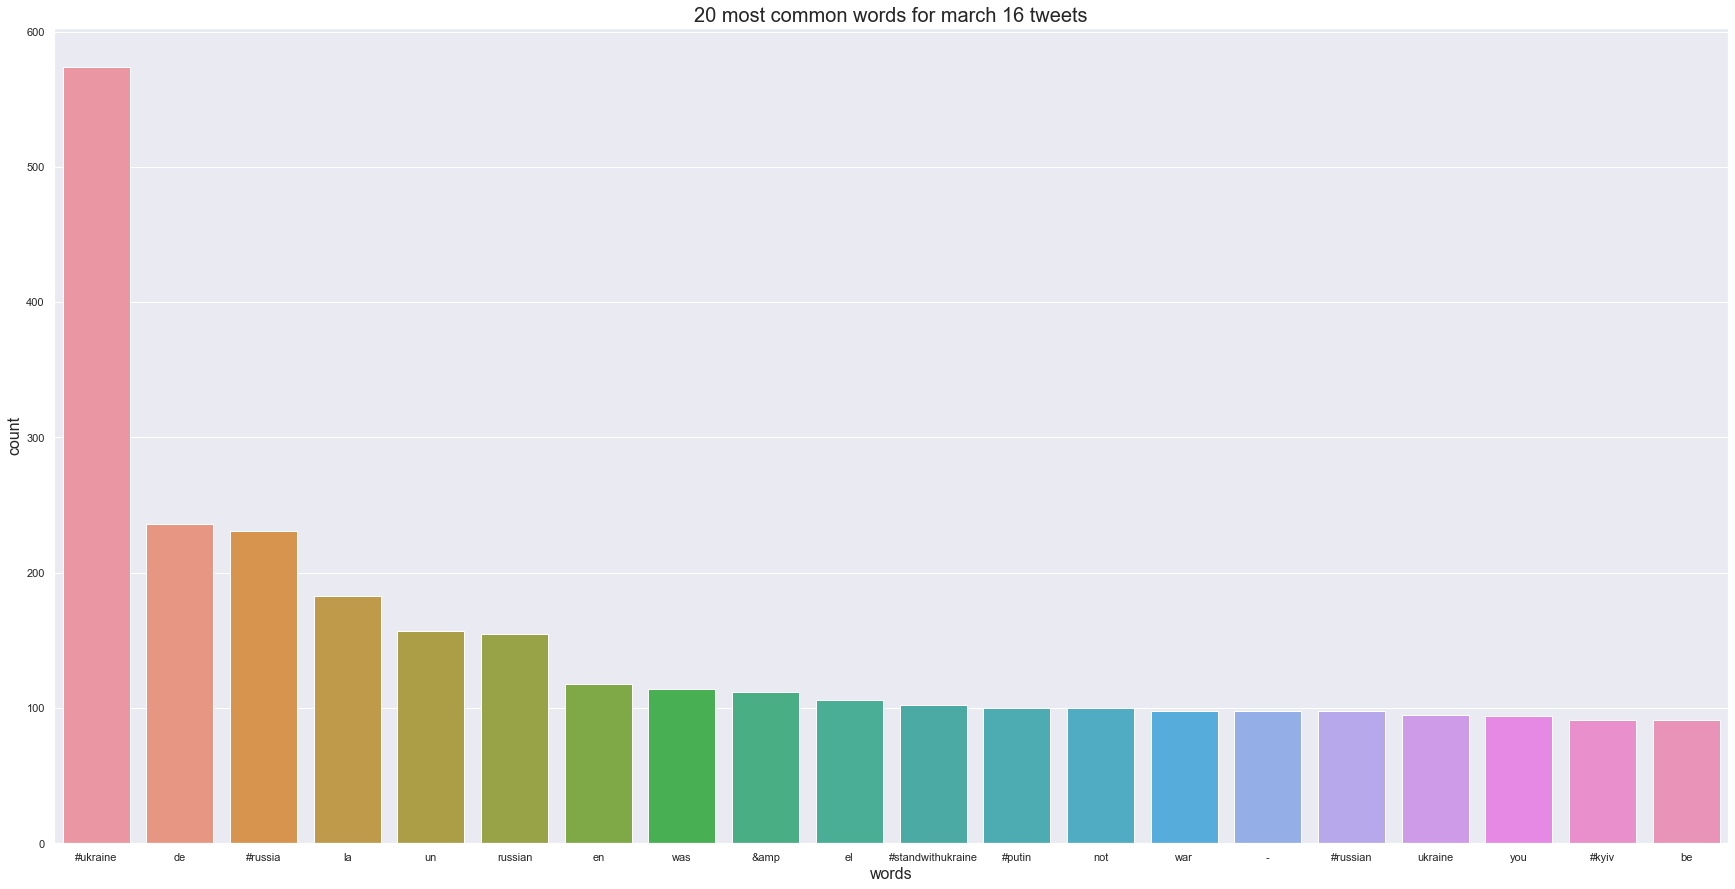

In [39]:
plt.figure(figsize=(30,15))
plt.title("20 most common words for march 16 tweets",fontsize =20)
sns.barplot(x=keys, y=vals)
plt.xlabel('words',fontsize=16)
plt.ylabel('count',size=16)

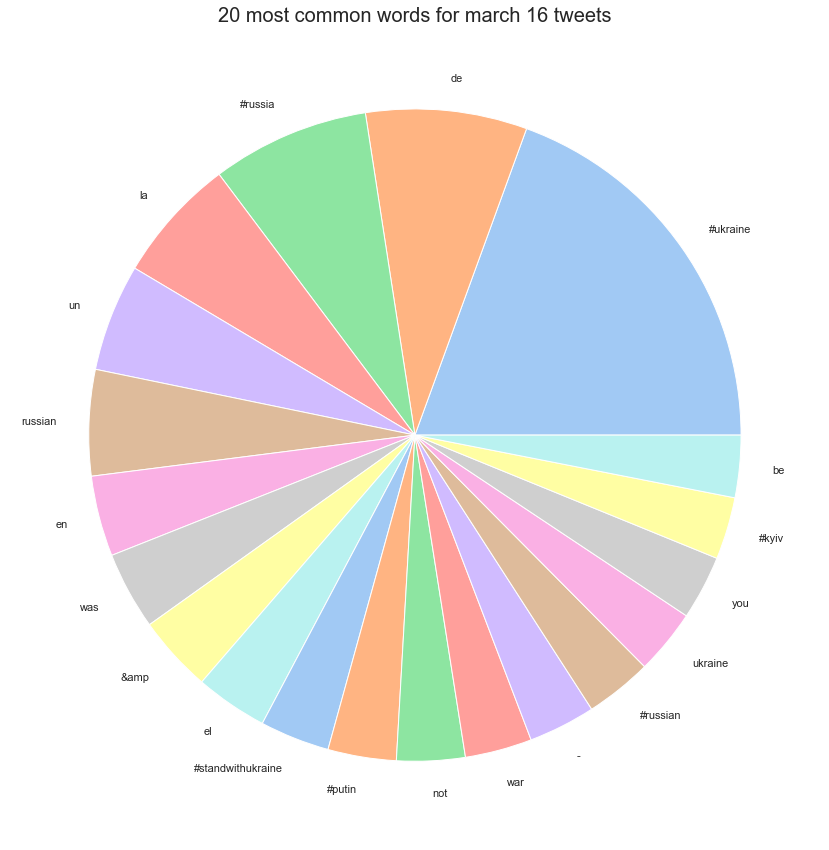

In [40]:
plt.figure(figsize=(30,15))
plt.title("20 most common words for march 16 tweets",fontsize =20)
colors = sns.color_palette('pastel')[0:19]
plt.pie(vals, labels=keys, colors = colors)
plt.show()

In [41]:
#creating the word dictionary for feb 28 tweets
feb_28_words = {}
count = 0
for tweet in feb28_tweets:
    if detect(tweet) != 'en':
        pass
    add_to_tweet_dictionary(str(tweet),feb_28_words)
    count += 1
    #only using 1200 samples
    if count == 1200:
        break

# and then making a dictionary for top 20 words    
top_20_feb_28_words ={}
count = 0
for w in sorted(feb_28_words, key=feb_28_words.get, reverse=True):
    top_20_feb_28_words[w] = feb_28_words[w]
    count += 1
    if count > 19:
        break
    
top_20_feb_28_words    

{'#ukraine': 730,
 '#russia': 677,
 '#putin': 371,
 'will': 344,
 '&amp': 278,
 '#russiaukrainewar': 194,
 'any': 192,
 'be': 187,
 'russian': 184,
 'ukrainian': 163,
 '#ukrainerussiawar': 157,
 'country': 154,
 'ukraine': 150,
 'it': 132,
 'who': 130,
 'putin': 125,
 'govt': 119,
 'do': 118,
 'he': 117,
 'people': 111}

In [42]:
keys = list (top_20_feb_28_words .keys())
vals = list(top_20_feb_28_words.values())

Text(0, 0.5, 'count')

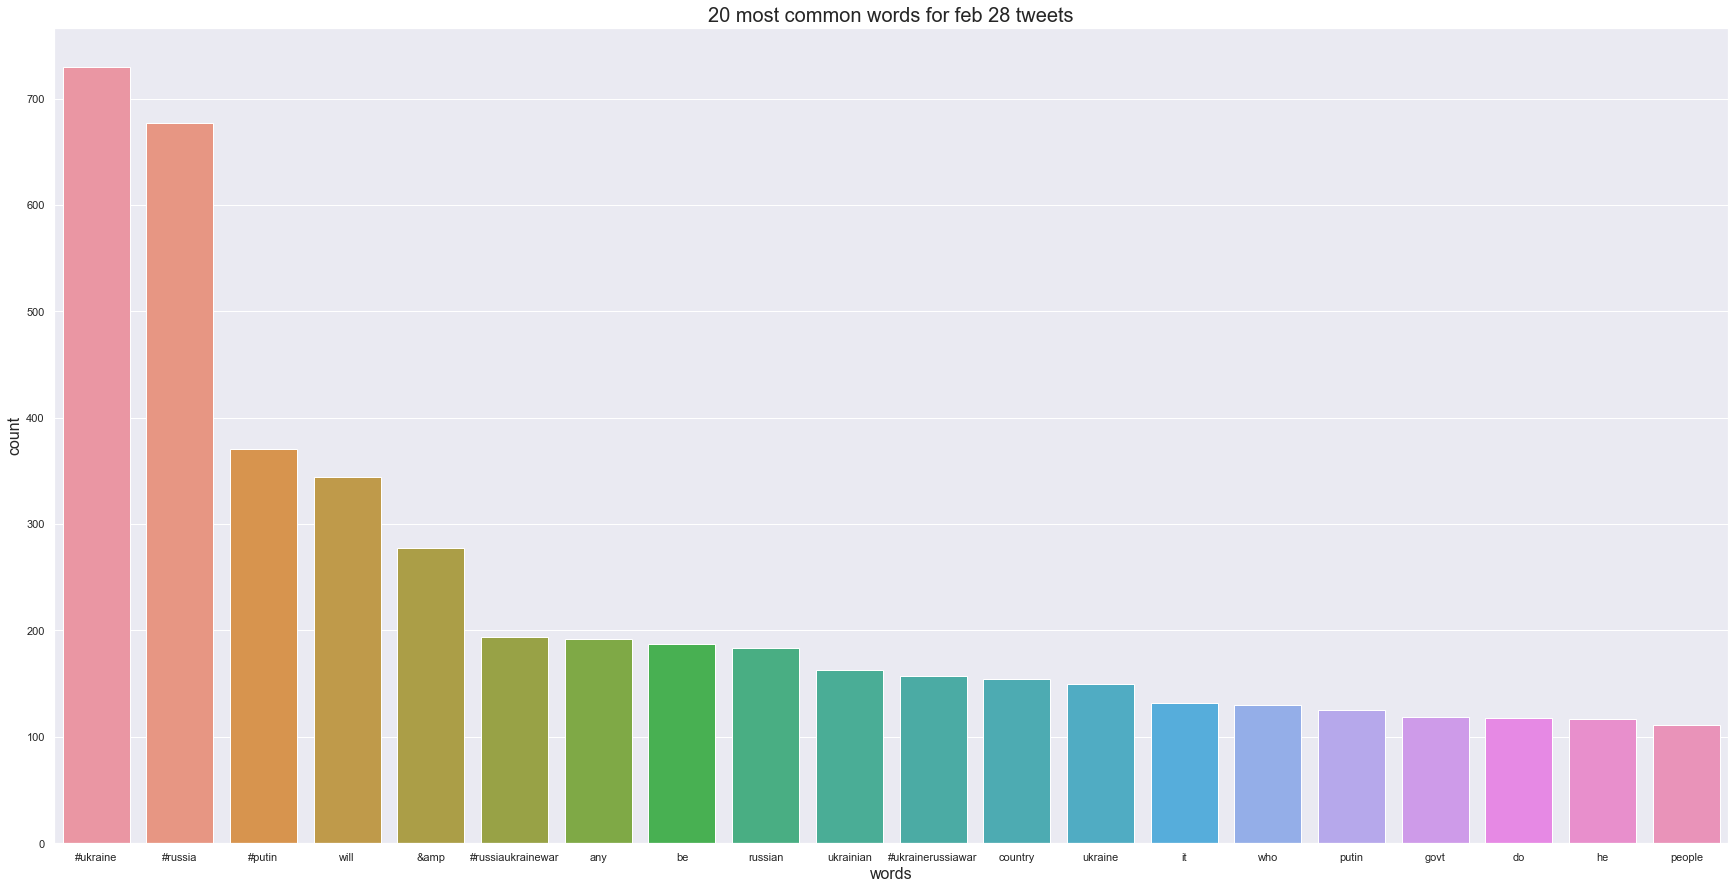

In [43]:
plt.figure(figsize=(30,15))
plt.title("20 most common words for feb 28 tweets",fontsize =20)
sns.barplot(x=keys, y=vals)
plt.xlabel('words',fontsize=16)
plt.ylabel('count',size=16)

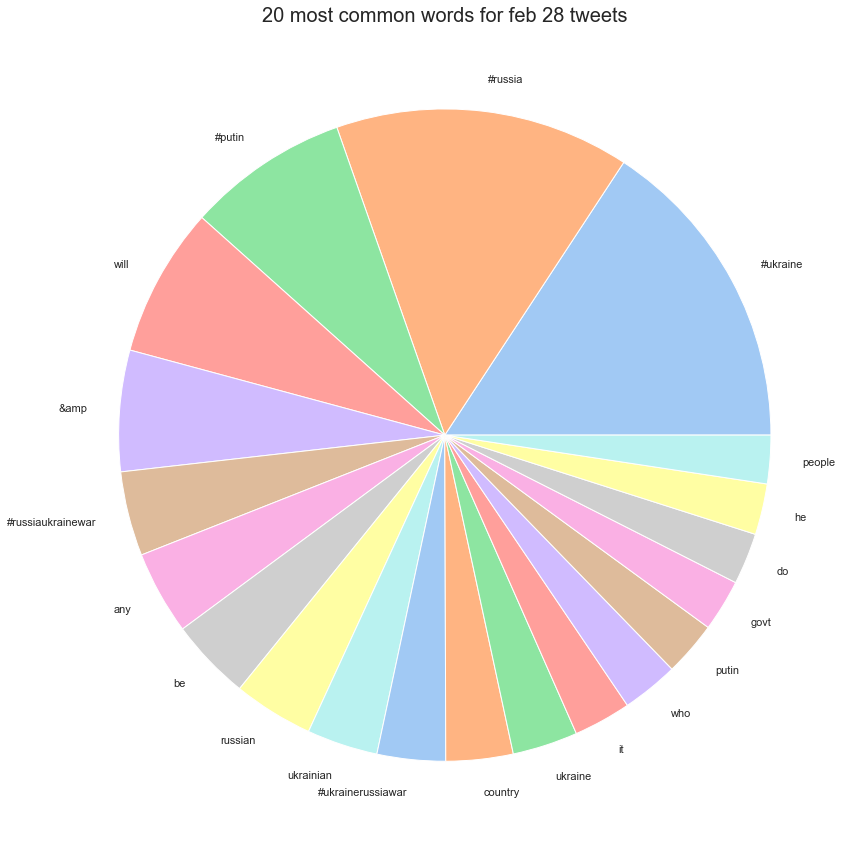

In [44]:
plt.figure(figsize=(30,15))
plt.title("20 most common words for feb 28 tweets",fontsize =20)
colors = sns.color_palette('pastel')[0:19]
plt.pie(vals, labels=keys, colors = colors)
plt.show()